In [1]:
# For this practical example we will need the following libraries and modules
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Loading the data

In [2]:
# Load the data from a .csv in the same folder
raw_data = pd.read_csv('Real-life-example.csv')

# Let's explore the top 5 rows of the df
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


#### Step 1: Preprocessing
##### Exploring the descriptive statistics of the variables

In [3]:
# Descriptive statistics are very useful for initial exploration of the variables
# By default, only descriptives for the numerical variables are shown
# To include the categorical ones, you should specify this with an argument
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [5]:
raw_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [9]:
# Let's simply drop all missing values
# This is not always recommended, however, when we remove less than 5% of the data, it is okay
data_no_mv = raw_data.dropna(axis=0)

In [8]:
# Let's check the descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

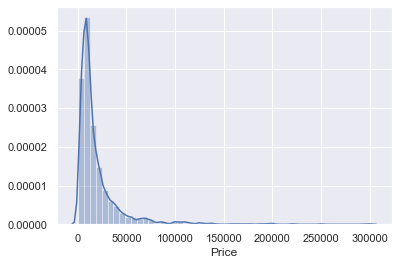

In [10]:
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, such as outliers
# The PDF is often the basis on which we decide whether we want to transform a feature
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [12]:
# Outliers are a great issue for OLS, thus we must deal with them in some way
# It may be a useful exercise to try training a model without removing the outliers

# Let's declare a variable that will be equal to the 90th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.90)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = data_no_mv[data_no_mv['Price']<q]
# In this way we have essentially removed the top 1% of the data about 'Price'
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3622,3622.000000,3622,3622.000000,3622.000000,3622,3622,3622.000000,3622
unique,7,NaN,6,NaN,NaN,4,2,NaN,280
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,850,NaN,1444,NaN,NaN,1608,3251,NaN,183
mean,NaN,12951.076521,NaN,177.020983,2.688192,NaN,NaN,2005.546107,NaN
std,NaN,9028.269200,NaN,97.240484,5.183080,NaN,NaN,6.507230,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6500.000000,NaN,110.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10400.000000,NaN,170.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,17500.000000,NaN,240.000000,2.800000,NaN,NaN,2011.000000,NaN


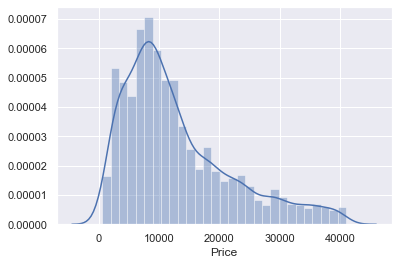

In [13]:
# We can check the PDF once again to ensure that the result is still distributed in the same way overall
# however, there are much fewer outliers
sns.distplot(data_1['Price'])

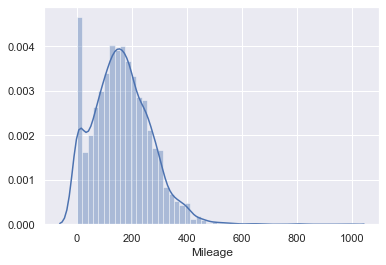

In [14]:
sns.distplot(data_no_mv['Mileage'])

In [17]:
q = data_1['Mileage'].quantile(0.90)
data_2 = data_1[data_1['Mileage']<q]

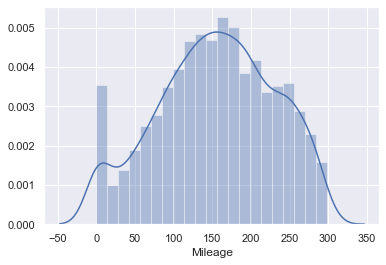

In [18]:
sns.distplot(data_2['Mileage'])

In [19]:
# A simple Google search can indicate the natural domain of this variable
# Car engine volumes are usually (always?) below 6.5l
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_3 = data_2[data_2['EngineV']<6.5]

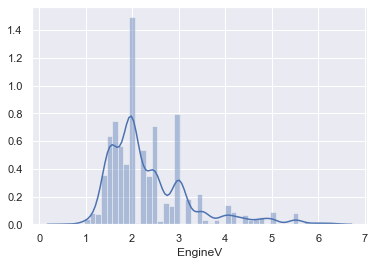

In [20]:
# Even so, in this course we won't, but that's yet something else you may try on your own
sns.distplot(data_3['EngineV'])

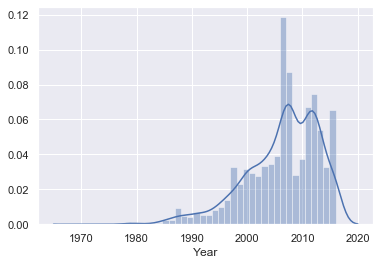

In [21]:
# Finally, the situation with 'Year' is similar to 'Price' and 'Mileage'
# However, the outliers are on the low end
sns.distplot(data_no_mv['Year'])

In [26]:
# I'll simply remove them
q = data_3['Year'].quantile(0.05)
data_4 = data_3[data_3['Year']>q]

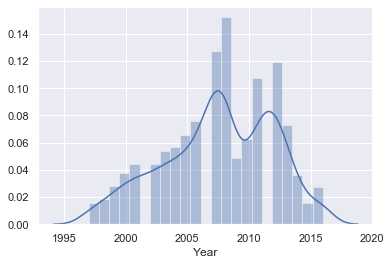

In [27]:
# Here's the new result
sns.distplot(data_4['Year'])

In [28]:
# Finally, once we reset the index, a new column will be created containing the old index (just in case)
# We won't be needing it, thus 'drop=True' to completely forget about it
data_cleaned = data_4.reset_index(drop=True)
# Let's see what's left
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3022,3022.000000,3022,3022.000000,3022.000000,3022,3022,3022.000000,3022
unique,7,NaN,6,NaN,NaN,4,2,NaN,243
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,Kangoo
freq,708,NaN,1100,NaN,NaN,1368,2748,NaN,130
mean,NaN,14464.946463,NaN,152.813700,2.363415,NaN,NaN,2007.521178,NaN
std,NaN,8991.092739,NaN,73.381538,0.912160,NaN,NaN,4.457239,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1997.000000,NaN
25%,NaN,8000.000000,NaN,101.000000,1.800000,NaN,NaN,2005.000000,NaN
50%,NaN,11900.000000,NaN,155.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,19000.000000,NaN,206.000000,2.800000,NaN,NaN,2011.000000,NaN


### Checking the OLS assumptions

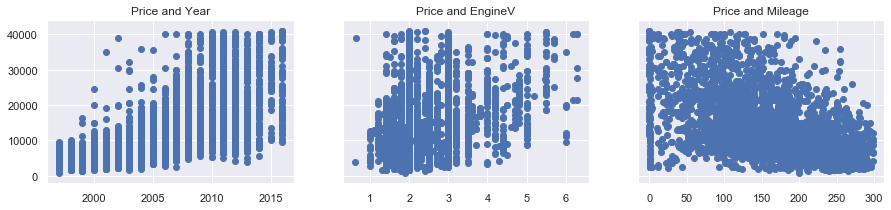

In [29]:
# Here we decided to use some matplotlib code, without explaining it
# You can simply use plt.scatter() for each of them (with your current knowledge)
# But since Price is the 'y' axis of all the plots, it made sense to plot them side-by-side (so we can compare them)
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')


plt.show()

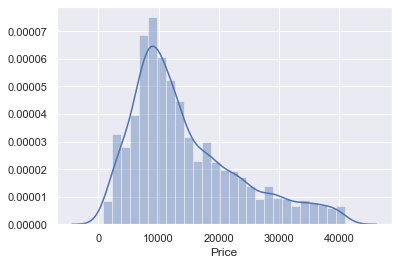

In [30]:
# From the subplots and the PDF of price, we can easily determine that 'Price' is exponentially distributed
# A good transformation in that case is a log transformation
sns.distplot(data_cleaned['Price'])

#### Checking for Multicollinearity VIF(variance inflation factor)

In [31]:
# Let's quickly see the columns of our data frame
data_cleaned.columns.values

array(['Brand', 'Price', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model'], dtype=object)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity
# since our categorical data is not yet preprocessed, we will only take the numerical ones
variables = data_cleaned[['Mileage','Year','EngineV']]

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [35]:
vif

,VIF,Features
0,5.436429,Mileage
1,10.566858,Year
2,7.886054,EngineV


In [37]:
# Since Year has the highest VIF, I will remove it from the model
# This will drive the VIF of other variables down!!! 
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

#### Create dummy variables

In [38]:
# To include the categorical data in the regression, let's create dummies
# There is a very convenient method called: 'get_dummies' which does that seemlessly
# It is extremely important that we drop one of the dummies, alternatively we will introduce multicollinearity
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [39]:
# Here is the result
data_with_dummies.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,23000.0,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18300.0,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14200.0,200,2.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10799.0,193,1.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400.0,212,1.8,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Conventionally, the most intuitive order is: dependent variable, indepedendent numerical variables, dummies

In [43]:
# Renaming the df
data_preprocessed = data_with_dummies
data_preprocessed.head()

,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vista,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_Yaris,Model_Z3,Model_Z4
0,23000.0,240,4.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18300.0,120,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14200.0,200,2.7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10799.0,193,1.5,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1400.0,212,1.8,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Linear Regression Model

#### Declare the inputs and the targets

In [78]:
# The target(s) (dependent variable y) is 'log price'
targets = data_preprocessed['Price']

# The inputs x, are everything BUT the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['Price'],axis=1)

### Scale the data

Feature Scaling or Standardization:

It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm

### scaler 

- contains all standardization info

In [80]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
# scaler.fit : is the scalling mechanism 
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
# Scale the features and store them in a new variable (the actual scaling procedure)
# here we apply the mechanism through 'scaler.transform(the new data)'
inputs_scaled = scaler.transform(inputs)

### Test Train Split

In [82]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Regression

In [83]:
# Create a linear regression object
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

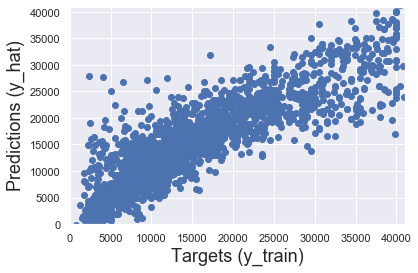

In [91]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(0,41000)
plt.ylim(0,41000)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

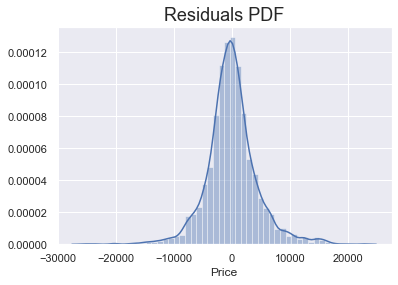

In [92]:
# Another useful check of our model is a residual plot
# We can plot the PDF of the residuals and check for anomalies
# Residuals - the difference between the targets and the predictions
sns.distplot(y_train - y_hat)

# Include a title
plt.title("Residuals PDF", size=18)

# In the best case scenario this plot should be normally distributed
# In our case we notice that there are many negative residuals (far away from the mean)
# Given the definition of the residuals (y_train - y_hat), negative values imply
# that y_hat (predictions) are much higher than y_train (the targets)

### Finding weights and bias

In [101]:
# The bias (intercept) of the regression
reg.intercept_

-1890608888812095.0

#### Find the coefficients

In [102]:
#Obtaining the weights (coefficients of the regression)
reg.coef_

array([-3.70707827e+03,  6.62370608e+01,  5.37423575e+15,  5.89593394e+15,
       -1.40428561e+16, -1.47261550e+16,  3.38945766e+16,  5.66688352e+15,
       -1.30957540e+02,  4.61000000e+02,  3.95000000e+02,  4.47500000e+01,
        3.59500000e+02, -1.23200000e+03, -3.39000000e+02, -1.35000000e+03,
        2.69606250e+03,  3.59875000e+02,  3.64593750e+02, -1.42437500e+02,
        2.69000000e+02,  2.93250000e+02,  3.74000000e+02,  5.28000000e+02,
        1.08500000e+03,  9.00000000e+01,  4.38000000e+02,  4.58875000e+02,
        5.38843750e+02,  3.52000000e+02,  5.17500000e+02, -7.60649651e+16,
        5.73000000e+02,  2.03150000e+03,  6.14000000e+02,  7.82750000e+02,
        6.78250000e+02,  1.05737500e+03,  8.43000000e+02,  2.91750000e+02,
       -1.84553536e+16, -3.61759707e+15,  3.26000000e+02,  2.80500000e+02,
        1.07687500e+03,  3.63000000e+02,  2.72750000e+02,  3.07625000e+02,
        9.46000000e+02,  4.06000000e+02,  2.89047105e+14,  2.94250000e+02,
        1.65250000e+02,  

### R - squared

In [98]:
reg.score(x_train, y_train)

0.7582196452101888

### Adjusted R - squared

In [53]:
def adjusted_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [99]:
r2_adj = adjusted_r2(x_train, y_train)
r2_adj

0.729188068070383

### Calculating the univariate p-values of the variables

#### Feature Selection

In [55]:
from sklearn.feature_selection import f_regression

In [100]:
f_regression(x_train,y_train)
p_values = f_regression(x_train,y_train)[1]
p_values.round(3)

/Users/veronicatimofte/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)
/Users/veronicatimofte/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:293: RuntimeWarning: invalid value encountered in sqrt
  n_samples * X_means ** 2)


array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.009, 0.109, 0.   , 0.   , 0.597, 0.012, 0.   , 0.   , 0.827,
       0.752, 0.223, 0.134, 0.313, 0.171, 0.006, 0.003, 0.37 , 0.482,
       0.764, 0.384, 0.338, 0.011,   nan, 0.006, 0.   , 0.629, 0.004,
       0.085, 0.083, 0.313, 0.252,   nan,   nan, 0.222, 0.406, 0.521,
       0.166, 0.593, 0.203, 0.001, 0.411, 0.406, 0.059, 0.51 , 0.065,
       0.121, 0.848, 0.569, 0.036, 0.011, 0.   , 0.003, 0.459,   nan,
       0.657, 0.3  , 0.253, 0.499, 0.921, 0.109, 0.506, 0.842, 0.358,
       0.859, 0.183, 0.026, 0.024, 0.399, 0.   , 0.023, 0.005, 0.001,
       0.008, 0.634, 0.699, 0.098, 0.406, 0.406, 0.93 , 0.406, 0.604,
       0.249, 0.784, 0.076, 0.   , 0.118, 0.728, 0.179, 0.161, 0.406,
       0.073, 0.028, 0.008, 0.438, 0.756, 0.857, 0.762, 0.084, 0.411,
       0.76 , 0.156, 0.   , 0.683, 0.965, 0.053, 0.   ,   nan, 0.   ,
       0.223, 0.001, 0.   , 0.005, 0.002, 0.088, 0.003, 0.626, 0.11 ,
       0.   , 0.544,

### Create a summary table with your findings

In [106]:
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
reg_summary = pd.DataFrame(data = inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary

,Features,Weights,p-values
0,Mileage,-3707.08,0.00
1,EngineV,66.24,0.00
2,Brand_BMW,5374235746232758.00,0.00
3,Brand_Mercedes-Benz,5895933935326528.00,0.00
4,Brand_Mitsubishi,-14042856104429042.00,0.00
5,Brand_Renault,-14726154982338344.00,0.00
6,Brand_Toyota,33894576603046508.00,0.00
7,Brand_Volkswagen,5666883518133176.00,0.00
8,Body_hatch,-130.96,0.00
9,Body_other,461.00,0.01


In [116]:
# Check the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['Audi', 'Toyota', 'Renault', 'Volkswagen', 'BMW', 'Mitsubishi',
       'Mercedes-Benz'], dtype=object)

### Testing

In [108]:
# Once we have trained and fine-tuned our model, we can proceed to testing it
# Testing is done on a dataset that the algorithm has never seen
# test inputs are 'x_test', while the outputs: 'y_test' 
# We SHOULD NOT TRAIN THE MODEL ON THEM, we just feed them and find the predictions
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

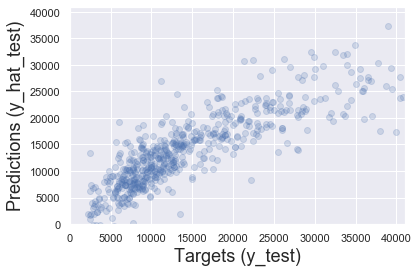

In [114]:
# Create a scatter plot with the test targets and the test predictions
# You can include the argument 'alpha' which will introduce opacity to the graph
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(0,41000)
plt.ylim(0,41000)
plt.show()

In [118]:
# Finally, let's manually check these predictions
df_pf = pd.DataFrame(y_hat_test, columns=['Prediction'])
df_pf.head()b

,Prediction
0,10073.50
1,7968.50
2,14075.50
3,23658.50
4,23051.50


In [120]:
# We can also include the test targets in that data frame (so we can manually compare them)
df_pf['Target'] = y_test
df_pf

,Prediction,Target
0,10073.50,9999.00
1,7968.50,4150.00
2,14075.50,13200.00
3,23658.50,21900.00
4,23051.50,24900.00
5,9743.50,9500.00
6,12535.50,10850.00
7,20931.50,22900.00
8,15313.50,11800.00
9,11209.50,9900.00


In [121]:
# Additionally, we can calculate the difference between the targets and the predictions
# Note that this is actually the residual (we already plotted the residuals)
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

# Since OLS is basically an algorithm which minimizes the total sum of squared errors (residuals),
# this comparison makes a lot of sense

In [122]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10073.50,9999.00,-74.50,0.75
1,7968.50,4150.00,-3818.50,92.01
2,14075.50,13200.00,-875.50,6.63
3,23658.50,21900.00,-1758.50,8.03
4,23051.50,24900.00,1848.50,7.42
5,9743.50,9500.00,-243.50,2.56
6,12535.50,10850.00,-1685.50,15.53
7,20931.50,22900.00,1968.50,8.60
8,15313.50,11800.00,-3513.50,29.78
9,11209.50,9900.00,-1309.50,13.23


In [123]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,605.00,605.00,605.00,605.00
mean,-9443669524008512.00,14317.69,9443669524022840.00,369169384530361.19
std,428130063879918656.00,8846.11,428130063879917888.00,3193001568992741.50
min,-5223929006477783040.00,1600.00,-3928186407384885760.00,0.12
25%,8282.50,7900.00,-2354.00,9.37
50%,12928.50,11500.00,268.50,21.25
75%,18121.50,18999.00,2536.50,37.38
max,3928186407384924672.00,40800.00,5223929006477794304.00,46229460234316760.00


In [129]:
# Sometimes it is useful to check these outputs manually
# To see all rows, we use the relevant pandas syntax
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
315,32460.50,32500.00,39.50,0.12
63,7882.50,7900.00,17.50,0.22
538,7682.50,7700.00,17.50,0.23
169,9298.50,9350.00,51.50,0.55
497,12419.50,12350.00,-69.50,0.56
435,7954.50,8000.00,45.50,0.57
25,12986.50,12900.00,-86.50,0.67
340,11418.50,11500.00,81.50,0.71
495,17961.50,17835.00,-126.50,0.71
246,23820.50,23999.00,178.50,0.74


### R-squared 

- for our x_test and y_test

In [126]:
reg.score(x_test, y_test)

-2.3434636373651794e+27